# **Olympics Data Analysis**
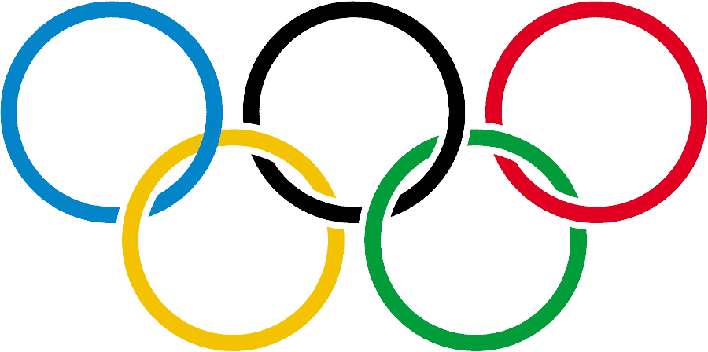

* Definition (Olympic Games)

Olympic is a popular sporting event. The Olympics first started in 1896 in Athens, Greece. The 5 rings in the logo represent the five continents, namely Europe, Africa, Asia, America and Oceania.


* Project Propose

Performing Exploratory Data Analysis (EDA) using Python and relevant libraries to analyze and describe also visualize past Olympic data and answer specific questions.

## **Import Library**

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Load The Dataset**
### Dataset link

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


In [2]:
#Load the dataset
athletes = pd.read_csv("athlete_events.csv")

regions = pd.read_csv("noc_regions.csv")

In [3]:
#Printing 5 random data from the dataframe
athletes.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
68150,34816,Gabriel Diego Fernndez,M,27.0,204.0,111.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Gold
74986,38052,Florentin Mihai Galiceanu,M,23.0,180.0,70.0,Romania,ROU,2006 Winter,2006,Winter,Torino,Cross Country Skiing,Cross Country Skiing Men's 30 km Skiathlon,NaN
110674,55977,Karen Julia Josephson,F,24.0,162.0,55.0,United States,USA,1988 Summer,1988,Summer,Seoul,Synchronized Swimming,Synchronized Swimming Women's Solo,NaN
218028,109518,Anatoly Ivanovich Shelyukhin,M,25.0,NaN,NaN,Soviet Union,URS,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
62292,31889,Mohamed Ben Mohamed El Gourch,M,24.0,165.0,60.0,Morocco,MAR,1960 Summer,1960,Summer,Roma,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN


In [4]:
#Printing 5 random data from the dataframe
regions.sample(5)

,NOC,region,notes
111,KSA,Saudi Arabia,NaN
83,GUA,Guatemala,NaN
58,DOM,Dominican Republic,NaN
221,VIN,Saint Vincent,NaN
165,PUR,Puerto Rico,NaN


## **Data Preprocessing**

In [5]:
#Joining the dataframes
athletes_df = athletes.merge(regions, how = "left", on = "NOC")

#Show first 5 rows of the new dataframes
athletes_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
#Showing the shape of the dataframe
print(athletes_df.shape)

print("Dataframe mempunyai 271116 baris dan 17 kolom")

(271116, 17)
Dataframe mempunyai 271116 baris dan 17 kolom


In [7]:
#Fixing the column names
athletes_df.rename(columns = {"region" : "Region", "notes" : "Notes"},
                   inplace = True)

In [8]:
athletes_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
#Printing info of the dataframe
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
#Printing statistical information (Descriptive statistics) of the dataframe
athletes_df.describe(include = "all")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783,270746,5039
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3,205,21
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372,18853,2583
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Check the null values in the dataframe
nan_columns = athletes_df.isnull().any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
#Showing sum of null values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
#Print the column names containing missing values in the form of a list
athletes_list_null = athletes_df.columns[athletes_df.isnull().any()].tolist()
athletes_list_null

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

## **Exploratory Data Analysis (EDA)**



### Indonesia Olympics Details (1896-2016)



In [14]:
athletes_df.query("Team == 'Indonesia'").head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
541,310,Patmawati Abdul Wahid,F,32.0,158.0,58.0,Indonesia,INA,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Lightweight,NaN,Indonesia,NaN
1852,1019,Selvyana Adrian-Sofyan,F,33.0,151.0,52.0,Indonesia,INA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Indonesia,NaN
1853,1019,Selvyana Adrian-Sofyan,F,37.0,151.0,52.0,Indonesia,INA,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Women's Air Pistol, 10 metres",NaN,Indonesia,NaN
1854,1019,Selvyana Adrian-Sofyan,F,37.0,151.0,52.0,Indonesia,INA,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Women's Sporting Pistol, 25 metres",NaN,Indonesia,NaN
2331,1301,Sri Wahyuni Agustiani,F,21.0,147.0,47.0,Indonesia,INA,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Flyweight,Silver,Indonesia,NaN


### Japan Olympics Details (1896-2016)

In [15]:
#Japan olympics details (1896-2016)
athletes_df.query("Team == 'Japan'").head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


### Top 10 Participating Countries

In [16]:
#Top 10 participating countries

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
print(top_10_countries)

print("-----")
print("The most participating country on olympics from 1896-2016 is United States"", followed by France and so on")

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64
-----
The most participating country on olympics from 1896-2016 is United States, followed by France and so on


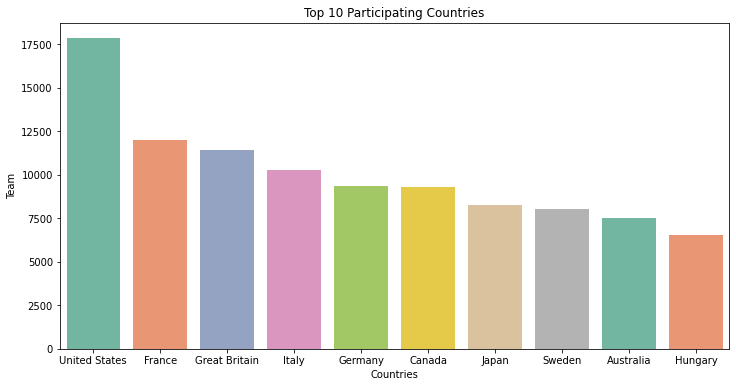

In [17]:
#Visualize the top 10 participating countries

plt.figure(figsize = (12,6))
#plt.xticks(rotation=20)
plt.xlabel("Countries")
plt.ylabel("Sum of Team")
plt.title("Top 10 Participating Countries")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = "Set2")

### Olympic Participant Age Distributions 

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

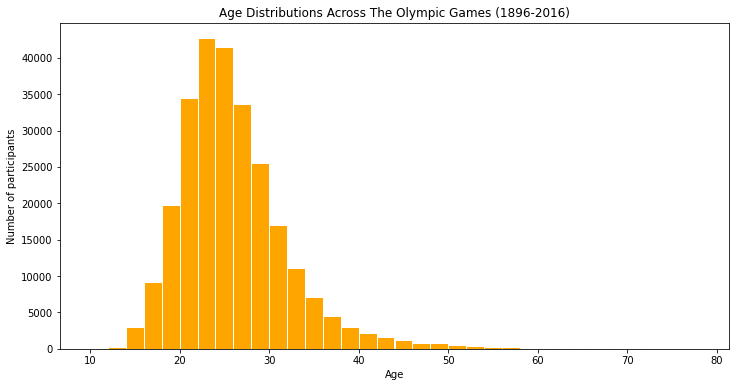

In [18]:
#Age distributions of the participants of olympic games
plt.figure(figsize=(12,6))
plt.title("Age Distributions Across The Olympic Games (1896-2016)")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color="orange", edgecolor="White")

### Winter Olympics and Summer Olympics Sports

In [19]:
#Winter olympics sports
winter_sports = athletes_df[athletes_df.Season == "Winter"].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [20]:
#Summer olympics sports
summer_sports = athletes_df[athletes_df.Season == "Summer"].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Male and Femal Participants

In [21]:
#Male and female participants
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8968cf9490>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

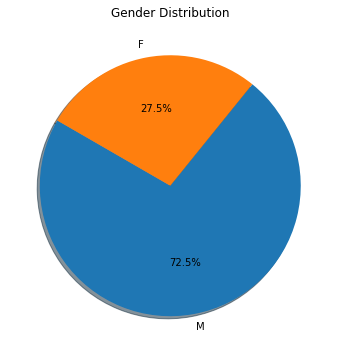

In [22]:
#Visualization for male and female athletes
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=150, shadow=True)

### Total Medals Olympic Games (1896-2016)

In [23]:
#Total medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Female Athletes (Summer Olympic Games)

In [24]:
#Total number of female athletes in each olympics (summer)
female_participants = athletes_df[(athletes_df.Sex == "F") & (athletes_df.Season =="Summer")][["Sex", "Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [25]:
women_olympics = athletes_df[(athletes_df.Sex == "F") & (athletes_df.Season =="Summer")]

Text(0.5, 1.0, 'Women Participation - Summer Olympics')

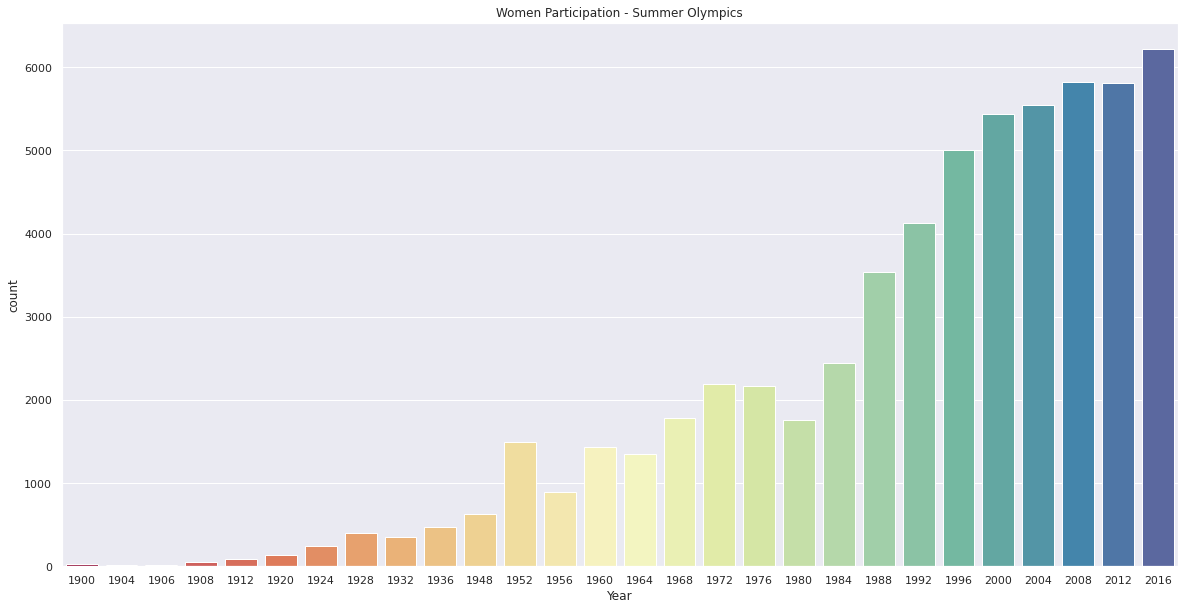

In [26]:
#Visualize female athletes in each olympics (summer) - countplot
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=women_olympics, palette="Spectral")
plt.title("Women Participation - Summer Olympics")

Text(0.5, 1.0, 'Women Participation - Summer Olympics')

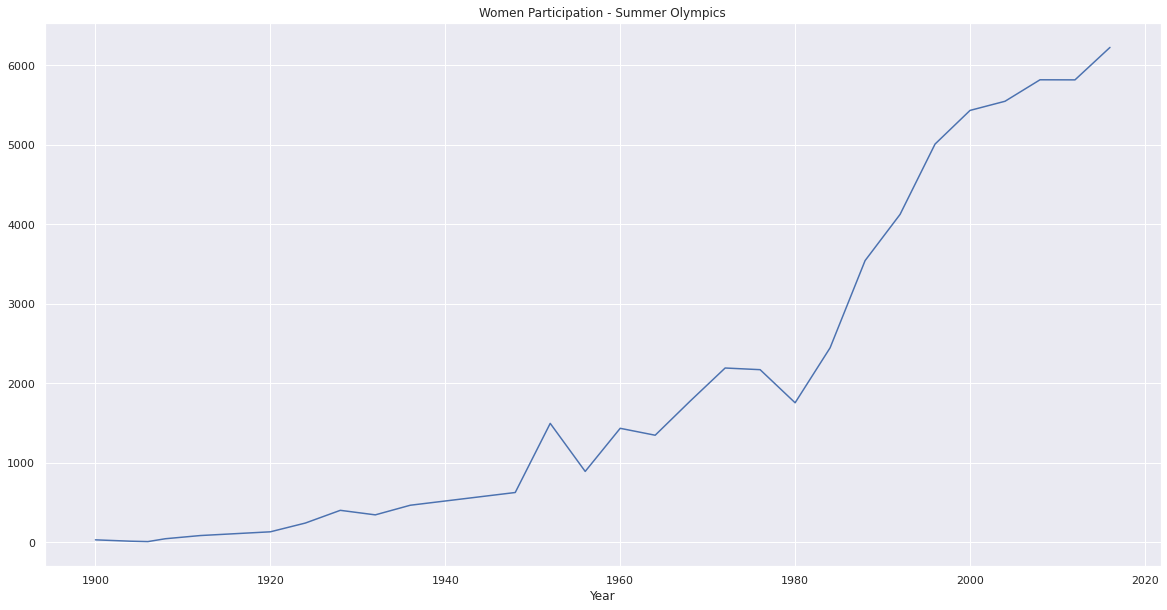

In [27]:
#Visualize female athletes over time (summer) - lineplot
count_w_olympics = women_olympics.groupby("Year")["Sex"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
count_w_olympics[:,"F"].plot()
plt.title("Women Participation - Summer Olympics")

### Male Athletes (Summer Olympic Games)

In [28]:
#Total number of male athletes in each olympics (summer)
male_participants = athletes_df[(athletes_df.Sex=="M") & (athletes_df.Season=="Summer")][["Sex", "Year"]]
male_participants = male_participants.groupby("Year").count().reset_index()
male_participants.tail()

,Year,Sex
24,2000,8390
25,2004,7897
26,2008,7786
27,2012,7105
28,2016,7465


In [29]:
man_olympics = athletes_df[(athletes_df.Sex == "M") & (athletes_df.Season =="Summer")]

Text(0.5, 1.0, 'Man Participation - Summer Olympics')

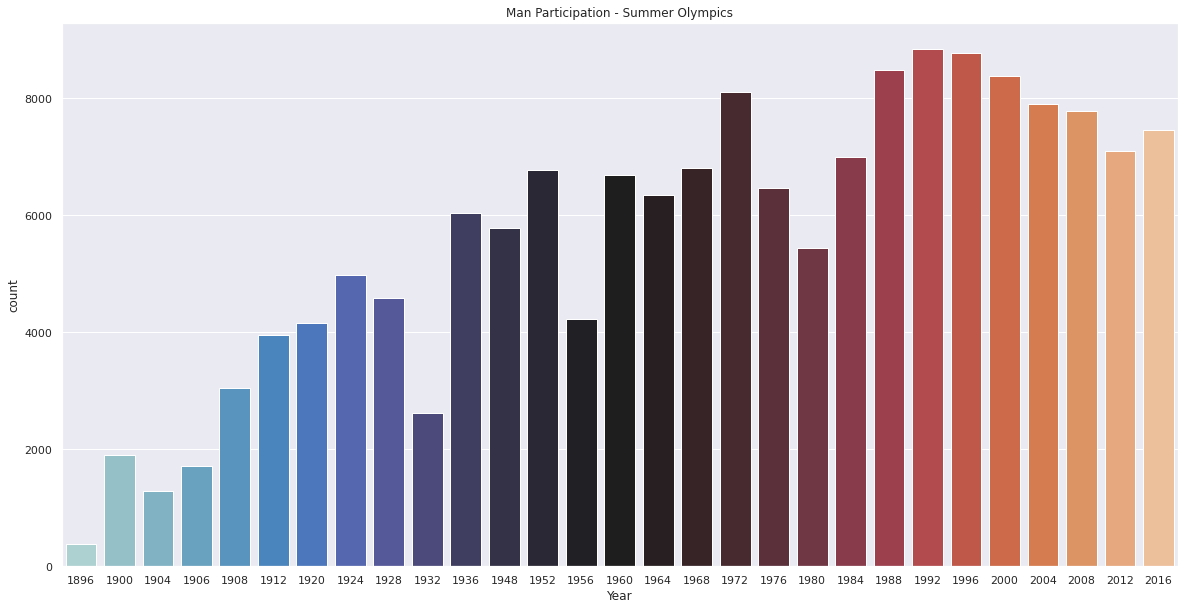

In [30]:
#Visualize male athletes over time (summer) - countplot
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=man_olympics, palette="icefire")
plt.title("Man Participation - Summer Olympics")

Text(0.5, 1.0, 'Male Participation - Summer Olympics')

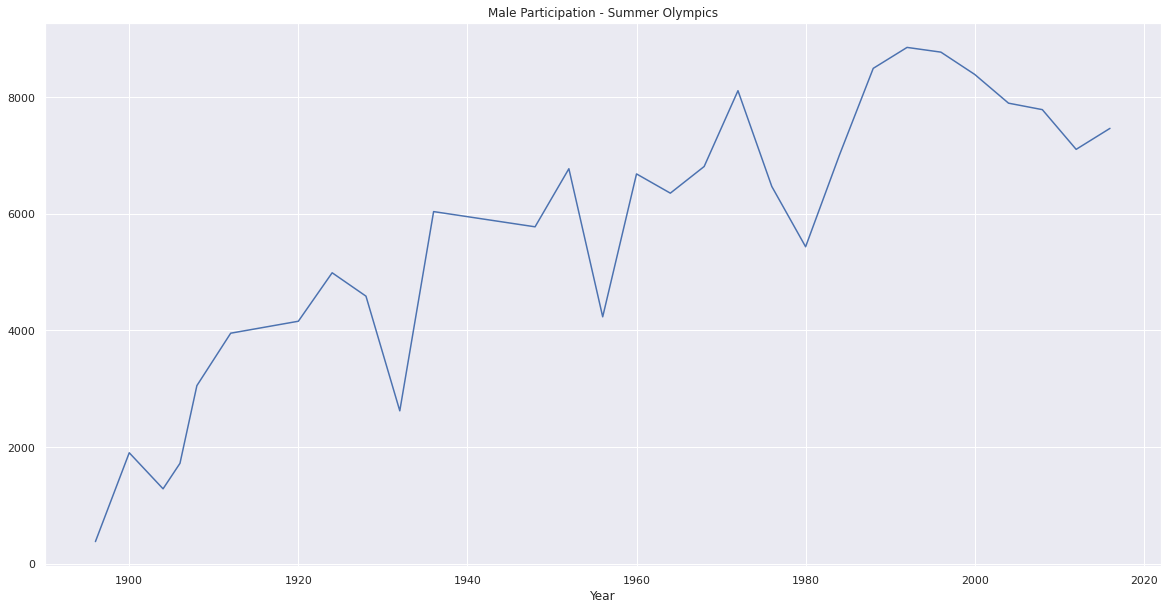

In [31]:
#Visualize male athletes over time (summer) - lineplot
count_m_olympics = man_olympics.groupby("Year")["Sex"].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
count_m_olympics[:,"M"].plot()
plt.title("Male Participation - Summer Olympics")

### Gold Medalists

In [32]:
#Gold medal athletes

gold_medals = athletes_df[(athletes_df.Medal=="Gold")]
gold_medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [33]:
gold_medals = gold_medals[np.isfinite(gold_medals["Age"])] #Taking only not Not A Number values

#### Gold Medalists With Over 60 Years Old

In [34]:
#Athletes that won gold medals with age more than 60 year

gold_medals["ID"][gold_medals["Age"]>60].count()

6

In [35]:
sporting_events = gold_medals["Sport"][gold_medals["Age"]>60]
sporting_events

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 Years Old')

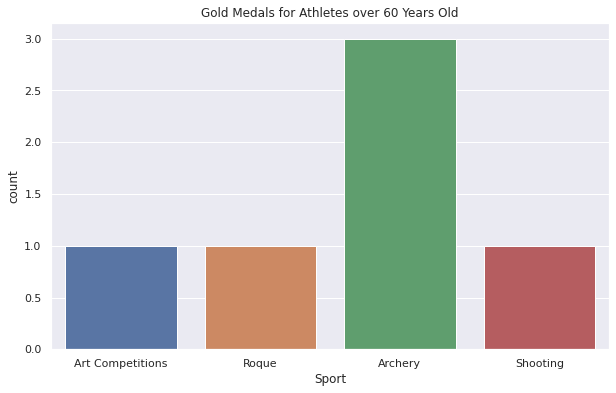

In [36]:
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.countplot(sporting_events)
plt.title("Gold Medals for Athletes over 60 Years Old")

#### Gold Medals for Each Country

In [37]:
#Gold medals for each country
gold_medals.Region.value_counts().reset_index(name="Medal").head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Top 5 Olympic Gold Medalist Countries')

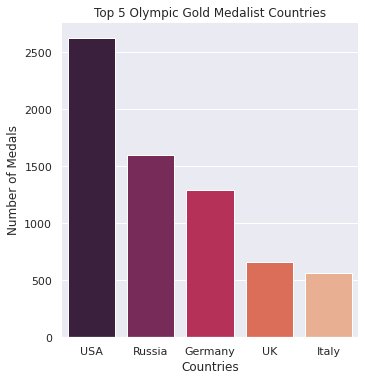

In [38]:
total_gold_medals = gold_medals.Region.value_counts().reset_index(name="Medal").head(5)
gold = sns.catplot(x="index", y="Medal", data=total_gold_medals, height=5, kind="bar", palette="rocket")
gold.despine(left=True)
gold.set_xlabels("Countries")
gold.set_ylabels("Number of Medals")
plt.title("Top 5 Olympic Gold Medalist Countries")


### Rio Summer Olympic Games

In [39]:
#Rio Summer Olympics

max_year = athletes_df.Year.max()
max_year

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == "Gold")].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

#### Top 20 Rio Olympic Gold Medalist Countries

Text(0.5, 0, 'Top 20 Rio Olympic Gold Medalist Countries')

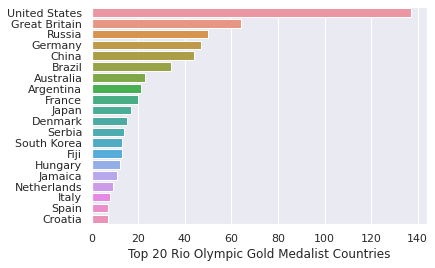

In [40]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel("Top 20 Rio Olympic Gold Medalist Countries")

### Height vs Weight of Olympics Medalists

In [41]:
not_null_medals = athletes_df[(athletes_df["Height"].notnull()) & (athletes_df["Weight"].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympics Medalists')

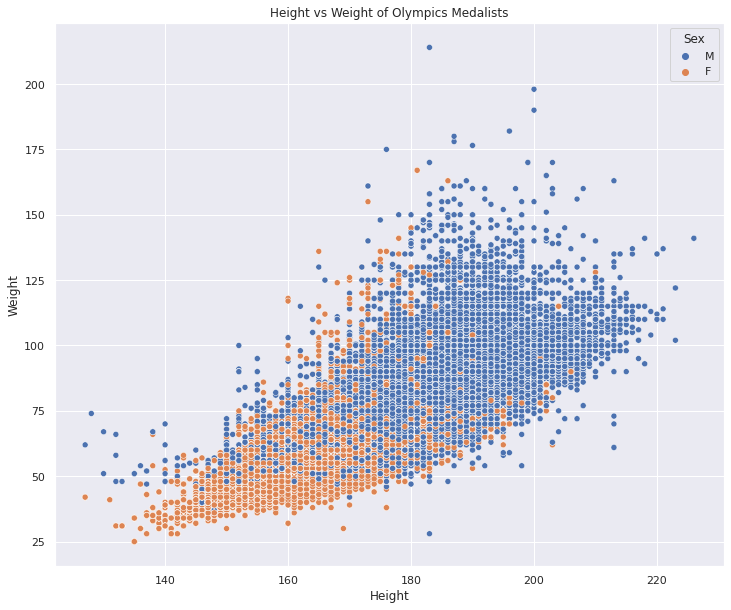

In [42]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x="Height", y="Weight", data=not_null_medals, hue="Sex")
plt.title("Height vs Weight of Olympics Medalists")